<a href="https://colab.research.google.com/github/Dil99818/Transfer_learning01/blob/main/NLP_(Natural_Language_Processing_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

#Disaster & Real Disaster Data_set
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

def unzip_data(url):
  import zipfile
  data_url= zipfile.ZipFile(url)
  data_url= data_url.extractall()
 

unzip_data("nlp_getting_started.zip")

--2022-07-24 12:01:51--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-07-24 12:01:51 (82.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]

--2022-07-24 12:01:51--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.214.128, 173.194.215.128, 173.194.217.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [

In [3]:
def performance_calculate(model_preds, true_values, model_history):
  from sklearn.metrics import precision_recall_fscore_support
  model_precesion, model_recall, model_fscore, _ = precision_recall_fscore_support(model_preds, true_values, average="weighted")
  model_accuracy = model_history.history["val_accuracy"][-1]

  model_result= {"model_precession": model_precesion, 
                "model_recall": model_recall, 
                "model_fscore": model_fscore, 
                "model_accuracy": model_accuracy
                }

  return model_result

In [4]:
import pandas as pd
train_data= pd.read_csv("train.csv") 
test_data= pd.read_csv("test.csv")

train_data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [5]:
train_data["text"][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [6]:
train_data_shuffled= train_data.sample(frac=1, random_state=42)
train_data_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [7]:
import random
random_number = random.choice(range(len(train_data)))

print(f"Random_number: {random_number}\n")
train_data["text"][random_number], train_data["target"][random_number]

Random_number: 2305



("I bought a 64oz jar of peanut butter and it's just getting demolished", 0)

In [8]:
train_data["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [9]:
# How many samples total?
print(f"Total training samples: {len(train_data)}")
print(f"Total test samples: {len(test_data)}")
print(f"Total samples: {len(train_data) + len(test_data)}")


Total training samples: 7613
Total test samples: 3263
Total samples: 10876


# Model_0 (Naive Bayes with TF-IDF encoder(baseline)

In [10]:
#Split data into train & validation
from sklearn.model_selection import train_test_split

x_train, y_train, x_test, y_test = train_test_split(train_data_shuffled['text'].to_numpy(), 
                                                    train_data_shuffled['target'].to_numpy(),
                                                    test_size=0.1, 
                                                    random_state=42)

In [11]:
len(x_train), len(y_test), len(y_train), len(x_test)

(6851, 762, 762, 6851)

In [12]:
train_data_shuffled['text'].to_numpy()[:2]

array(['So you have a new weapon that can cause un-imaginable destruction.',
       'The f$&amp;@ing things I do for #GISHWHES Just got soaked in a deluge going for pads and tampons. Thx @mishacollins @/@'],
      dtype=object)

In [13]:
#Converting text into numbers
#Text vectorization (tokenization)
import tensorflow as tf

text_vectorization= tf.keras.layers.TextVectorization(
                                                      max_tokens= None,
                                                      standardize= "lower_and_strip_punctuation",
                                                      split= "whitespace",
                                                      ngrams=None,
                                                      output_mode= "int",
                                                      output_sequence_length= None
                                                      )

In [14]:
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in x_train])/len(x_train))

15

In [15]:
max_length= 15
max_vacab_len= 1000

text_vectorization=tf.keras.layers.TextVectorization(max_tokens= max_vacab_len, #Number of words in vocab
                                                     output_sequence_length = max_length, 
                                                     output_mode="int"
                                                     )

In [16]:
# Fit the text vectorizer to the training text
text_vectorization.adapt(x_train)

In [17]:
# Create sample sentence and tokenize it
sentence = "I love Tensorflow"

text_vectorization([sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  8, 110,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [18]:
import random
random_sentence = random.choice(x_train)

print(f"{random_sentence}\n")

text_vectorization([random_sentence])

Turn on ESPN2 and get blown up



<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[916,  11,   1,   7,  52, 468,  27,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [19]:
#Get the unique words in the vocabulary
words_in_vocab = text_vectorization.get_vocabulary() # To get most common & uniqe code
top_5_words= words_in_vocab[:5]
bottom_5_words= words_in_vocab[-5:] 

print(f"5 most common words: {top_5_words}")
print(f"5 least common words: {bottom_5_words}")

5 most common words: ['', '[UNK]', 'the', 'a', 'in']
5 least common words: ['reported', 'r', 'pray', 'playlist', 'patience']


In [20]:
len(words_in_vocab)

1000

In [21]:
#Creating an Embedding using an Embedding Layer
tf.random.set_seed(42)
embedding= tf.keras.layers.Embedding(input_dim=max_vacab_len, #The size of the vocabulary
                                     output_dim=128,
                                     embeddings_initializer= "uniform",
                                     input_length= max_length,
                                     name="Embedding_1")

embedding

In [22]:
import random

sentence1= random.choice(x_train)
print(f"{sentence1}\n\n")

embedded_sentence = embedding(text_vectorization(sentence1))
embedded_sentence

See Aug 4 2015 PoconoRecord @EmergencyMgtMag - How Many Households Have an #Emergency Plan? | http://t.co/7zlsUmIess http://t.co/TdccH01N7q




<tf.Tensor: shape=(15, 128), dtype=float32, numpy=
array([[-0.02948627,  0.01148951, -0.01514598, ..., -0.00025954,
        -0.02447712,  0.04342348],
       [-0.01976377,  0.02037274, -0.01112032, ..., -0.03593625,
        -0.01426295, -0.01100101],
       [-0.04893592,  0.0305549 , -0.00395172, ..., -0.00042392,
        -0.02374576, -0.01814268],
       ...,
       [ 0.01957505, -0.01195463, -0.02071192, ...,  0.04092873,
         0.0389426 ,  0.00011085],
       [ 0.03977952, -0.03782602, -0.03646283, ...,  0.00236253,
         0.03332629,  0.02803668],
       [ 0.03977952, -0.03782602, -0.03646283, ...,  0.00236253,
         0.03332629,  0.02803668]], dtype=float32)>

In [23]:
#Single token Embedding
print(f"sentence1[0][0]: {sentence1[0][0]}\n")
print(f"text_vectorization(sentence1): {text_vectorization(sentence1)}\n"), 
print(f"embedded_sentence[0][0]: {embedded_sentence[0][0]}\n")
print(f"embedded_sentence[0][0].shape: {embedded_sentence[0][0].shape}\n")
print(f"embedded_sentence[0]: {embedded_sentence[0]}")

sentence1[0][0]: S

text_vectorization(sentence1): [ 99 795 178 208   1   1  62 123   1  24  39  73 241   1   1]

embedded_sentence[0][0]: -0.02948627434670925

embedded_sentence[0][0].shape: ()

embedded_sentence[0]: [-0.02948627  0.01148951 -0.01514598 -0.01148516 -0.00735215 -0.02511486
  0.03538277  0.02630532  0.01632409 -0.00828558  0.02188753 -0.02601174
  0.02184752  0.04930481 -0.02080594 -0.01420866  0.01868147  0.01588101
  0.02214367  0.04268905 -0.01382654  0.02829729 -0.01068055 -0.03387648
 -0.03666351  0.04253091  0.02549371 -0.00578682  0.00717322 -0.01599176
  0.0073033  -0.03333086 -0.02512605 -0.017672   -0.01987592 -0.01250928
 -0.00616174  0.02029321  0.01474216  0.02674908 -0.0385749  -0.04116554
  0.03660392  0.03389076  0.00438081  0.00357238 -0.00060926  0.01954906
  0.03412228  0.01954906 -0.04610495  0.02765996  0.04736717  0.04304044
 -0.0095695  -0.01891834  0.02098506 -0.00035484 -0.02650476  0.00861952
  0.03095267 -0.04749161 -0.01095925 -0.01220249  0.

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer # feature_extraction
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()),
                    ("clf", MultinomialNB())
])

model_0.fit(x_train, x_test)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [25]:
baseline_score= model_0.score(y_train, y_test)
baseline_score

0.7926509186351706

In [26]:
baseline_preds= model_0.predict(y_train)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [27]:
y_test[:20]

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [28]:
#Let's get Accuracy, Precision, Recall, F1-score
def performance_calculater(y_true, y_pred):
  from sklearn.metrics import accuracy_score, precision_recall_fscore_support 

  model_precesion, model_recall, model_fscore, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  

  model_result= {"model_precession": model_precesion, 
                "model_recall": model_recall, 
                "model_fscore": model_fscore, 
                "model_accuracy": baseline_score
                }

  return model_result


baseline_result= performance_calculater(y_test, baseline_preds)
baseline_result

{'model_accuracy': 0.7926509186351706,
 'model_fscore': 0.7862189758049549,
 'model_precession': 0.8111390004213173,
 'model_recall': 0.7926509186351706}

# Model_1 - Feed-forward neural network (Dense_model)



In [29]:
#Create the tensorcallbacks
import datetime
def create_tensorboard_callback(dir_name, experiment_name):

  log_dir= dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("Y%M%D - H%M%S")

  tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir= log_dir)

  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [30]:
#Bulding the model with function API
import tensorflow as tf
inputs = tf.keras.layers.Input(shape=(1,), dtype= "string") #inputs are 1-dimensional strings
x=text_vectorization(inputs) #turning inputs into number
x= embedding(x) #create the embedding of the numerized number
x= tf.keras.layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding
outputs= tf.keras.layers.Dense(1, activation="sigmoid")(x) #Output layers,  want binary outputs so use sigmoid activation
model_1= tf.keras.Model(inputs, outputs, name="model_1_desne")

In [31]:
#Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ["accuracy"])

In [32]:
model_1.summary()

Model: "model_1_desne"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 Embedding_1 (Embedding)     (None, 15, 128)           128000    
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 128,129
Trainable params: 128,129
Non-t

In [33]:
model_1_history = model_1.fit(x_train,
                              x_test,
                              epochs=10,
                              validation_data= (y_train, y_test),
                              callbacks=[create_tensorboard_callback(dir_name="Tensorboard_for_NLP", 
                                                                     experiment_name="Model_1_simple_dense_model")])

Saving TensorBoard log files to: Tensorboard_for_NLP/Model_1_simple_dense_model/Y0207/24/22 - H0205
Epoch 1/10
215/215 [==============================] - 5s 5ms/step - loss: 0.6195 - accuracy: 0.6694 - val_loss: 0.5603 - val_accuracy: 0.7323
Epoch 2/10
215/215 [==============================] - 1s 4ms/step - loss: 0.4920 - accuracy: 0.7824 - val_loss: 0.5004 - val_accuracy: 0.7625
Epoch 3/10
215/215 [==============================] - 1s 4ms/step - loss: 0.4368 - accuracy: 0.8060 - val_loss: 0.4864 - val_accuracy: 0.7651
Epoch 4/10
215/215 [==============================] - 1s 4ms/step - loss: 0.4113 - accuracy: 0.8181 - val_loss: 0.4854 - val_accuracy: 0.7795
Epoch 5/10
215/215 [==============================] - 1s 4ms/step - loss: 0.3945 - accuracy: 0.8248 - val_loss: 0.4886 - val_accuracy: 0.7795
Epoch 6/10
215/215 [==============================] - 1s 4ms/step - loss: 0.3851 - accuracy: 0.8248 - val_loss: 0.4912 - val_accuracy: 0.7743
Epoch 7/10
215/215 [============================

In [34]:
model_1.evaluate(y_train, y_test)

24/24 [==============================] - 0s 3ms/step - loss: 0.5217 - accuracy: 0.7756


[0.5217219591140747, 0.7755905389785767]

In [35]:
model_1_pred = model_1.predict(y_train)
model_1_pred= tf.squeeze(tf.round(model_1_pred))
model_1_pred[:20], y_test[:20]

(<tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0.], dtype=float32)>,
 array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]))

In [36]:
model_1_result= performance_calculate(model_preds =model_1_pred, true_values =y_test, model_history = model_1_history)

#model_1_perfom = performance_calculater(y_test,  model_1_pred)
model_1_result

{'model_accuracy': 0.7755905389785767,
 'model_fscore': 0.7789816853531943,
 'model_precession': 0.7935944538666799,
 'model_recall': 0.7755905511811023}

In [37]:
embedding.weights

[<tf.Variable 'Embedding_1/embeddings:0' shape=(1000, 128) dtype=float32, numpy=
 array([[-0.00367384,  0.01771224, -0.03750538, ..., -0.04845433,
         -0.01433756,  0.02206464],
        [ 0.02986665, -0.03334517, -0.04502622, ..., -0.00209063,
          0.02327286,  0.03675828],
        [ 0.00164184,  0.05846192, -0.00399503, ..., -0.07480292,
         -0.05088829,  0.01642789],
        ...,
        [ 0.01251193,  0.03076386, -0.02765299, ...,  0.00814849,
         -0.00987025, -0.04361613],
        [-0.05239414,  0.04548172, -0.01812511, ..., -0.07733074,
         -0.0640303 ,  0.09204082],
        [-0.0114245 , -0.04992867,  0.01441223, ...,  0.02289988,
          0.06014376,  0.01224391]], dtype=float32)>]

In [38]:
embed_weights = model_1.get_layer("Embedding_1").get_weights()[0]
print(embed_weights.shape)

(1000, 128)


In [39]:
embed_weights

array([[-0.00367384,  0.01771224, -0.03750538, ..., -0.04845433,
        -0.01433756,  0.02206464],
       [ 0.02986665, -0.03334517, -0.04502622, ..., -0.00209063,
         0.02327286,  0.03675828],
       [ 0.00164184,  0.05846192, -0.00399503, ..., -0.07480292,
        -0.05088829,  0.01642789],
       ...,
       [ 0.01251193,  0.03076386, -0.02765299, ...,  0.00814849,
        -0.00987025, -0.04361613],
       [-0.05239414,  0.04548172, -0.01812511, ..., -0.07733074,
        -0.0640303 ,  0.09204082],
       [-0.0114245 , -0.04992867,  0.01441223, ...,  0.02289988,
         0.06014376,  0.01224391]], dtype=float32)

# Model_2 - RNN - LSTM (Long short term memory)

In [40]:
#Create the base model
inputs= tf.keras.layers.Input(shape=(1,), dtype="string")
x= text_vectorization(inputs)
x=embedding(x)
print(x.shape)
#x=tf.keras.layers.LSTM(64, return_sequences=True)(x)
#print(x.shape)
x=tf.keras.layers.LSTM(48)(x)
print(x.shape)
#x= tf.keras.layers.Dense(64, activation="relu")(x)
#print(x.shape)
outputs=tf.keras.layers.Dense(1, activation="sigmoid")(x)
print(outputs.shape)
model_2= tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 15, 128)
(None, 48)
(None, 1)


In [41]:
#compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [42]:
#fit the model
model_2_history= model_2.fit(x_train, x_test,
                             epochs=10,
                             validation_data= (y_train, y_test),
                             callbacks= [create_tensorboard_callback("Tensorboard_for_NLP", 
                                                                     "model_2_tensorboard_weigths")])

Saving TensorBoard log files to: Tensorboard_for_NLP/model_2_tensorboard_weigths/Y0207/24/22 - H0218
Epoch 1/10
215/215 [==============================] - 5s 7ms/step - loss: 0.3989 - accuracy: 0.8253 - val_loss: 0.5002 - val_accuracy: 0.7717
Epoch 2/10
215/215 [==============================] - 1s 5ms/step - loss: 0.3667 - accuracy: 0.8416 - val_loss: 0.4958 - val_accuracy: 0.7782
Epoch 3/10
215/215 [==============================] - 1s 5ms/step - loss: 0.3578 - accuracy: 0.8441 - val_loss: 0.5131 - val_accuracy: 0.7677
Epoch 4/10
215/215 [==============================] - 1s 5ms/step - loss: 0.3513 - accuracy: 0.8499 - val_loss: 0.5152 - val_accuracy: 0.7664
Epoch 5/10
215/215 [==============================] - 1s 5ms/step - loss: 0.3332 - accuracy: 0.8551 - val_loss: 0.5409 - val_accuracy: 0.7769
Epoch 6/10
215/215 [==============================] - 1s 6ms/step - loss: 0.3097 - accuracy: 0.8680 - val_loss: 0.5611 - val_accuracy: 0.7743
Epoch 7/10
215/215 [===========================

In [43]:
model_2_preds= model_2.predict(y_train)
model_2_preds[:10], model_2_preds.shape

(array([[0.9388378 ],
        [0.5146547 ],
        [0.992191  ],
        [0.01908536],
        [0.0704689 ],
        [0.99971634],
        [0.9987834 ],
        [0.98244023],
        [0.5522727 ],
        [0.07509224]], dtype=float32), (762, 1))

In [44]:
model_2_preds= tf.squeeze(tf.round(model_2_preds))
model_2_preds[:10], y_test[:10]

(<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>,
 array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0]))

In [45]:
model_2_result= performance_calculate(model_2_preds, y_test, model_2_history)
model_2_result

{'model_accuracy': 0.7572178244590759,
 'model_fscore': 0.7592185404081537,
 'model_precession': 0.7660259983743912,
 'model_recall': 0.7572178477690289}

# Model_3 (GRU + RNN)

In [46]:
#Creating base model for Model_3
inputs= tf.keras.layers.Input(shape=(1,), dtype="string")
x= text_vectorization(inputs)
x= embedding(x)
print(x.shape)
x= tf.keras.layers.GRU(8)(x)
print(x.shape)
outputs=tf.keras.layers.Dense(1, activation= "sigmoid")(x)
model_3=tf.keras.Model(inputs, outputs)

(None, 15, 128)
(None, 8)


In [47]:
model_3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 Embedding_1 (Embedding)     (None, 15, 128)           128000    
                                                                 
 gru (GRU)                   (None, 8)                 3312      
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 131,321
Trainable params: 131,321
Non-trainable params: 0
_______________________________________________________

In [48]:
#compile the model
model_3.compile(loss= "binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [49]:
#fit the model
model_3_history= model_3.fit(x_train, x_test,
                             validation_data=(y_train,y_test),
                             epochs=5,
                             callbacks=[create_tensorboard_callback("Tensorboard_for_NLP", "model_3_tensorboard_weights")])

Saving TensorBoard log files to: Tensorboard_for_NLP/model_3_tensorboard_weights/Y0207/24/22 - H0235
Epoch 1/5
215/215 [==============================] - 3s 7ms/step - loss: 0.5363 - accuracy: 0.7358 - val_loss: 0.5087 - val_accuracy: 0.7717
Epoch 2/5
215/215 [==============================] - 1s 5ms/step - loss: 0.3722 - accuracy: 0.8467 - val_loss: 0.5103 - val_accuracy: 0.7730
Epoch 3/5
215/215 [==============================] - 1s 5ms/step - loss: 0.3400 - accuracy: 0.8662 - val_loss: 0.5188 - val_accuracy: 0.7730
Epoch 4/5
215/215 [==============================] - 1s 5ms/step - loss: 0.3164 - accuracy: 0.8821 - val_loss: 0.5445 - val_accuracy: 0.7625
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.2964 - accuracy: 0.8888 - val_loss: 0.5573 - val_accuracy: 0.7585


In [50]:
model_3_pred= model_3.predict(y_train)
model_3_pred[:5]

array([[0.77231354],
       [0.7262611 ],
       [0.97145545],
       [0.0720992 ],
       [0.05980281]], dtype=float32)

In [51]:
model_3_pred= tf.squeeze(tf.round(model_3_pred))
model_3_pred[:10], y_test[:10]

(<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>,
 array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0]))

In [52]:
model_3_result= performance_calculate(model_3_pred, y_test, model_3_history) 
model_3_result

{'model_accuracy': 0.7585301995277405,
 'model_fscore': 0.7595396489312094,
 'model_precession': 0.7623142715606326,
 'model_recall': 0.7585301837270341}

# Model_4 (NLP + Bidirectional)

In [53]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM

inputs= tf.keras.layers.Input(shape=(1,), dtype="string")
x= text_vectorization(inputs)
x= embedding(x)
x= tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences= True))(x)
x=tf.keras.layers.GlobalAveragePooling1D()(x)
print(x.shape)
outputs=tf.keras.layers.Dense(1, activation="sigmoid")(x)
model_4= tf.keras.Model(inputs, outputs, name= "model_4_Bidirectional")


(None, 128)


In [54]:
model_4.summary()

Model: "model_4_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 Embedding_1 (Embedding)     (None, 15, 128)           128000    
                                                                 
 bidirectional (Bidirectiona  (None, 15, 128)          98816     
 l)                                                              
                                                                 
 global_average_pooling1d_1   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                             

In [55]:
#compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [56]:
#Fit the model
model_4_history= model_4.fit(x_train, x_test,
                             validation_data=(y_train, y_test),
                             epochs=6,
                             callbacks=[create_tensorboard_callback("Tensorboard_for_NLP", "model_2_tensorboard_weights")]
                             ) 

Saving TensorBoard log files to: Tensorboard_for_NLP/model_2_tensorboard_weights/Y0207/24/22 - H0243
Epoch 1/6
215/215 [==============================] - 5s 11ms/step - loss: 0.3565 - accuracy: 0.8574 - val_loss: 0.6009 - val_accuracy: 0.7559
Epoch 2/6
215/215 [==============================] - 2s 7ms/step - loss: 0.2935 - accuracy: 0.8805 - val_loss: 0.6267 - val_accuracy: 0.7520
Epoch 3/6
215/215 [==============================] - 2s 8ms/step - loss: 0.2604 - accuracy: 0.8948 - val_loss: 0.7024 - val_accuracy: 0.7415
Epoch 4/6
215/215 [==============================] - 2s 7ms/step - loss: 0.2405 - accuracy: 0.9047 - val_loss: 0.7231 - val_accuracy: 0.7598
Epoch 5/6
215/215 [==============================] - 2s 8ms/step - loss: 0.2170 - accuracy: 0.9134 - val_loss: 0.7881 - val_accuracy: 0.7323
Epoch 6/6
215/215 [==============================] - 2s 8ms/step - loss: 0.2043 - accuracy: 0.9156 - val_loss: 0.8662 - val_accuracy: 0.7533


In [57]:
model_4_preds = model_4.predict(y_train)
model_4_preds = tf.squeeze(model_4_preds)

model_4_preds = tf.round(model_4_preds)
model_4_preds[:10], y_test[:10]

(<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>,
 array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0]))

In [58]:
model_4_result= performance_calculate(model_4_preds, y_test, model_4_history)
model_4_result

{'model_accuracy': 0.7532808184623718,
 'model_fscore': 0.754750837203943,
 'model_precession': 0.7592141156018666,
 'model_recall': 0.7532808398950132}

# Model_5 (Conv1D)
https://poloclub.github.io/cnn-explainer/

In [59]:
embedding_test= embedding(text_vectorization(["I love Tesnforflow."]))
#for more understanding - https://poloclub.github.io/cnn-explainer/

Conv1D_layer = tf.keras.layers.Conv1D(filters=32,
                                      kernel_size=5, # size of a convolutional filter
                                      strides=1, #number of stpes 
                                      activation="relu",
                                      padding="same"
                                      )

Conv1D_output = Conv1D_layer(embedding_test)
max_pool_output = tf.keras.layers.GlobalAveragePooling1D()(Conv1D_output)


embedding_test.shape, 

(TensorShape([1, 15, 128]),)

In [60]:
max_pool_output

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[9.38796625e-03, 9.62223783e-02, 7.40988702e-02, 4.44302782e-02,
        1.39521761e-03, 2.49226674e-01, 1.21360816e-01, 1.15873460e-02,
        1.83114007e-01, 9.68049765e-02, 2.05224957e-02, 1.22708790e-01,
        9.97938868e-03, 1.33754630e-02, 3.66064683e-02, 3.24512459e-02,
        5.38922206e-04, 4.61964831e-02, 1.26883695e-02, 2.73984019e-02,
        1.71881571e-01, 6.66239336e-02, 9.79726519e-06, 6.69479789e-03,
        3.32875326e-02, 3.33967172e-02, 1.02681341e-02, 3.62717621e-02,
        1.15089051e-01, 3.30434628e-02, 9.54377092e-03, 2.69793756e-02]],
      dtype=float32)>

In [61]:
from tensorflow.python.ops.gen_math_ops import xlog1py_eager_fallback

inputs= tf.keras.layers.Input(shape =(1,), dtype="string")
x=text_vectorization(inputs)
x= embedding(x)

x = tf.keras.layers.Conv1D(filters=32,
                               kernel_size=3,
                               strides=1,
                               activation="relu",
                               padding="same"
                               )(x)
x= tf.keras.layers.GlobalAveragePooling1D()(x)
outputs= tf.keras.layers.Dense(1, activation="sigmoid")(x)
model_5= tf.keras.Model(inputs, outputs, name="Model_5_Conv1D")

In [62]:
model_5.summary()

Model: "Model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 Embedding_1 (Embedding)     (None, 15, 128)           128000    
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 32)            12320     
                                                                 
 global_average_pooling1d_3   (None, 32)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 1)              

In [63]:
#compile the model
model_5.compile(loss ="binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics =["accuracy"])

In [64]:
#Fit the model
model_5_history= model_5.fit(x_train, x_test,
                             validation_data = (y_train, y_test),
                             epochs=5,
                             callbacks=[create_tensorboard_callback("Tensorboard_for_NLP", "model_5_tensorboard_weigths")] 
                             ) 

Saving TensorBoard log files to: Tensorboard_for_NLP/model_5_tensorboard_weigths/Y0307/24/22 - H0304
Epoch 1/5
215/215 [==============================] - 3s 5ms/step - loss: 0.4028 - accuracy: 0.8281 - val_loss: 0.5234 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 1s 4ms/step - loss: 0.3547 - accuracy: 0.8475 - val_loss: 0.5475 - val_accuracy: 0.7703
Epoch 3/5
215/215 [==============================] - 1s 4ms/step - loss: 0.3457 - accuracy: 0.8488 - val_loss: 0.5510 - val_accuracy: 0.7638
Epoch 4/5
215/215 [==============================] - 1s 4ms/step - loss: 0.3409 - accuracy: 0.8518 - val_loss: 0.5591 - val_accuracy: 0.7651
Epoch 5/5
215/215 [==============================] - 1s 4ms/step - loss: 0.3324 - accuracy: 0.8548 - val_loss: 0.5663 - val_accuracy: 0.7598


In [65]:
model_5_preds = model_5.predict(y_train)
model_5_preds[:10]

array([[0.87672883],
       [0.6330468 ],
       [0.994261  ],
       [0.0662721 ],
       [0.04215106],
       [0.9967372 ],
       [0.81864935],
       [0.9335707 ],
       [0.5056435 ],
       [0.21874504]], dtype=float32)

In [66]:
model_5_preds  = tf.round(tf.squeeze(model_5_preds))

In [67]:
model_5_preds[:10], y_test[:10]

(<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>,
 array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0]))

In [68]:
model_5_result= performance_calculate(model_5_preds, y_test, model_5_history)
model_5_result

{'model_accuracy': 0.7598425149917603,
 'model_fscore': 0.764000049048374,
 'model_precession': 0.7812428540760241,
 'model_recall': 0.7598425196850394}

# Model_6_ (Using Pretrained Embeddings (transfer learning for NLP)

We can load in a TensorFlow Hub module using the hub.load() method and passing it the target URL of the module we'd like to use, in our case, it's "https://tfhub.dev/google/universal-sentence-encoder/4".

In [69]:
samples_sentence= "I love Tensoflow"
import tensorflow_hub as hub
embed= hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

embedded_samples= embed([samples_sentence])

In [70]:
embedded_samples[0].shape

TensorShape([512])

In [71]:
#Creating the Keras layer uning pretrained layer from tensorflow hub
sentence_encoder_layer= hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE"
                                        )

In [72]:
#create the model using Sequintial API
model_6= tf.keras.Sequential([
                            sentence_encoder_layer,
                            tf.keras.layers.Dense(128, activation= "relu"), #he convert -values in 0 & +Values as it's
                            tf.keras.layers.Dense(1, activation = "sigmoid")], #sigmoid convert values into 0 & 1
                             name="model_6_USE")

#Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 128)               65664     
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 256,863,617
Trainable params: 65,793
Non-trainable params: 256,797,824
_________________________________________________________________


In [73]:
#fit the model

model_6_history= model_6.fit(x_train,x_test,
                             validation_data=(y_train, y_test),
                             epochs=5,
                             callbacks=[create_tensorboard_callback("Tensorboard_for_NLP", "model_6_weights_tensorboard")]
                          
      
                             )

Saving TensorBoard log files to: Tensorboard_for_NLP/model_6_weights_tensorboard/Y0307/24/22 - H0336
Epoch 1/5
215/215 [==============================] - 5s 13ms/step - loss: 0.4869 - accuracy: 0.7894 - val_loss: 0.4425 - val_accuracy: 0.8005
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4093 - accuracy: 0.8154 - val_loss: 0.4296 - val_accuracy: 0.8163
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3937 - accuracy: 0.8257 - val_loss: 0.4261 - val_accuracy: 0.8163
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3837 - accuracy: 0.8300 - val_loss: 0.4214 - val_accuracy: 0.8150
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3734 - accuracy: 0.8387 - val_loss: 0.4253 - val_accuracy: 0.8189


In [74]:
model_6_preds = model_6.predict(y_train)
model_6_preds = tf.round(tf.squeeze(model_6_preds))
model_6_preds[:10], y_test[:10]

(<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>,
 array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0]))

In [75]:
model_6_result= performance_calculate(model_6_preds, y_test, model_6_history)
model_6_result

{'model_accuracy': 0.8188976645469666,
 'model_fscore': 0.8205400235901686,
 'model_precession': 0.8281493548938565,
 'model_recall': 0.8188976377952756}

# Model_7 - Working_with_10%_of_data + (clone_model)

In [76]:
#Let's build the model the same as model_6
model_7 = tf.keras.models.clone_model(model_6)

#compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )

model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 128)               65664     
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 256,863,617
Trainable params: 65,793
Non-trainable params: 256,797,824
_________________________________________________________________


In [77]:
ten_precent = int(0.10* len(train_data_shuffled))

text_10p = train_data_shuffled["text"][:ten_precent].to_numpy()
label_10p= train_data_shuffled["target"][:ten_precent].to_numpy()

len(label_10p), len(text_10p)

(761, 761)

In [78]:
#Fit the model
model_7_history = model_7.fit(text_10p, label_10p,
                              validation_data=(y_train, y_test),
                              epochs=6,
                              callbacks=[create_tensorboard_callback("Tensorboard_for_NLP", "model_7_Tensorboard_weights_for_10P_data")]
                              )

Saving TensorBoard log files to: Tensorboard_for_NLP/model_7_Tensorboard_weights_for_10P_data/Y0307/24/22 - H0355
Epoch 1/6
24/24 [==============================] - 3s 40ms/step - loss: 0.6575 - accuracy: 0.6978 - val_loss: 0.6109 - val_accuracy: 0.7874
Epoch 2/6
24/24 [==============================] - 1s 23ms/step - loss: 0.5579 - accuracy: 0.8081 - val_loss: 0.5265 - val_accuracy: 0.7874
Epoch 3/6
24/24 [==============================] - 1s 24ms/step - loss: 0.4687 - accuracy: 0.8173 - val_loss: 0.4772 - val_accuracy: 0.7927
Epoch 4/6
24/24 [==============================] - 0s 19ms/step - loss: 0.4126 - accuracy: 0.8239 - val_loss: 0.4577 - val_accuracy: 0.7953
Epoch 5/6
24/24 [==============================] - 1s 24ms/step - loss: 0.3778 - accuracy: 0.8371 - val_loss: 0.4518 - val_accuracy: 0.7940
Epoch 6/6
24/24 [==============================] - 1s 23ms/step - loss: 0.3517 - accuracy: 0.8528 - val_loss: 0.4513 - val_accuracy: 0.7848


In [79]:
model_7_preds = model_7.predict(y_train)
model_7_preds = tf.round(tf.squeeze(model_7_preds))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [80]:
model_7_result= performance_calculate(model_7_preds, y_test, model_7_history)
model_7_result

{'model_accuracy': 0.7847769260406494,
 'model_fscore': 0.7848277176873326,
 'model_precession': 0.784889379457253,
 'model_recall': 0.7847769028871391}

**Using same model_7 with diferrent kind of spliting the data (Train_tets_split)**

In [81]:
text_data_10p, text_data_90p, label_10p, label_90p= train_test_split(train_data_shuffled["text"].to_numpy(),
                 train_data_shuffled["target"].to_numpy(),
                 test_size=0.9,
                 random_state=42)

len(text_data_10p),len(label_10p)

(761, 761)

In [82]:
model_7_history1 = model_7.fit(x=text_data_10p, y= label_10p,
                              validation_data=(text_data_90p, label_90p),
                              epochs=6,
                              )

Epoch 1/6
24/24 [==============================] - 2s 87ms/step - loss: 0.4273 - accuracy: 0.8055 - val_loss: 0.4358 - val_accuracy: 0.8079
Epoch 2/6
24/24 [==============================] - 2s 87ms/step - loss: 0.3889 - accuracy: 0.8305 - val_loss: 0.4332 - val_accuracy: 0.8059
Epoch 3/6
24/24 [==============================] - 2s 85ms/step - loss: 0.3609 - accuracy: 0.8463 - val_loss: 0.4368 - val_accuracy: 0.8062
Epoch 4/6
24/24 [==============================] - 2s 86ms/step - loss: 0.3403 - accuracy: 0.8528 - val_loss: 0.4415 - val_accuracy: 0.8018
Epoch 5/6
24/24 [==============================] - 2s 86ms/step - loss: 0.3191 - accuracy: 0.8686 - val_loss: 0.4476 - val_accuracy: 0.7995
Epoch 6/6
24/24 [==============================] - 2s 85ms/step - loss: 0.3009 - accuracy: 0.8752 - val_loss: 0.4530 - val_accuracy: 0.7977


In [83]:
train_data_shuffled_10p= train_data_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)
#train_data_shuffled_10p[:10]

test_data_10p = train_data_shuffled_10p["target"].to_list()
train_data_10p= train_data_shuffled_10p["text"].to_list()

**Here we are geting more accuracy with 10% of data then all data cause of data leakage problem**

In [84]:
#Fit the model
model_7_history2 = model_7.fit(train_data_10p, test_data_10p,
                              validation_data=(y_train, y_test),
                              epochs=6,
                              )

Epoch 1/6
24/24 [==============================] - 0s 20ms/step - loss: 0.4659 - accuracy: 0.8003 - val_loss: 0.4236 - val_accuracy: 0.8163
Epoch 2/6
24/24 [==============================] - 0s 19ms/step - loss: 0.4141 - accuracy: 0.8213 - val_loss: 0.3858 - val_accuracy: 0.8320
Epoch 3/6
24/24 [==============================] - 0s 20ms/step - loss: 0.3810 - accuracy: 0.8305 - val_loss: 0.3599 - val_accuracy: 0.8425
Epoch 4/6
24/24 [==============================] - 0s 19ms/step - loss: 0.3572 - accuracy: 0.8410 - val_loss: 0.3389 - val_accuracy: 0.8465
Epoch 5/6
24/24 [==============================] - 0s 19ms/step - loss: 0.3373 - accuracy: 0.8489 - val_loss: 0.3206 - val_accuracy: 0.8570
Epoch 6/6
24/24 [==============================] - 0s 19ms/step - loss: 0.3198 - accuracy: 0.8581 - val_loss: 0.3039 - val_accuracy: 0.8701


# Camparing the result of all models 

In [85]:
all_model_result= pd.DataFrame({
    "model_0_result()BaseLine_model":baseline_result,
    "model_1_result(Dense_model)": model_1_result,
                                "model_2_result(RNN)": model_2_result,
                                "model_3_result(GRU + RNN)": model_3_result,
                                "model_4_result(NLP + Bidirectional": model_4_result,
                                "model_5_result(Conv1D)": model_5_result,
                                "model_6_result(Transfer_Learning)": model_6_result,
                                "model_7_result(working_with_only_10%_Data)": model_7_result
                                })

In [86]:
all_model_result = all_model_result.transpose()
all_model_result

,model_precession,model_recall,model_fscore,model_accuracy
model_0_result()BaseLine_model,0.811139,0.792651,0.786219,0.792651
model_1_result(Dense_model),0.793594,0.775591,0.778982,0.775591
model_2_result(RNN),0.766026,0.757218,0.759219,0.757218
model_3_result(GRU + RNN),0.762314,0.758530,0.759540,0.758530
model_4_result(NLP + Bidirectional,0.759214,0.753281,0.754751,0.753281
model_5_result(Conv1D),0.781243,0.759843,0.764000,0.759843
model_6_result(Transfer_Learning),0.828149,0.818898,0.820540,0.818898
model_7_result(working_with_only_10%_Data),0.784889,0.784777,0.784828,0.784777


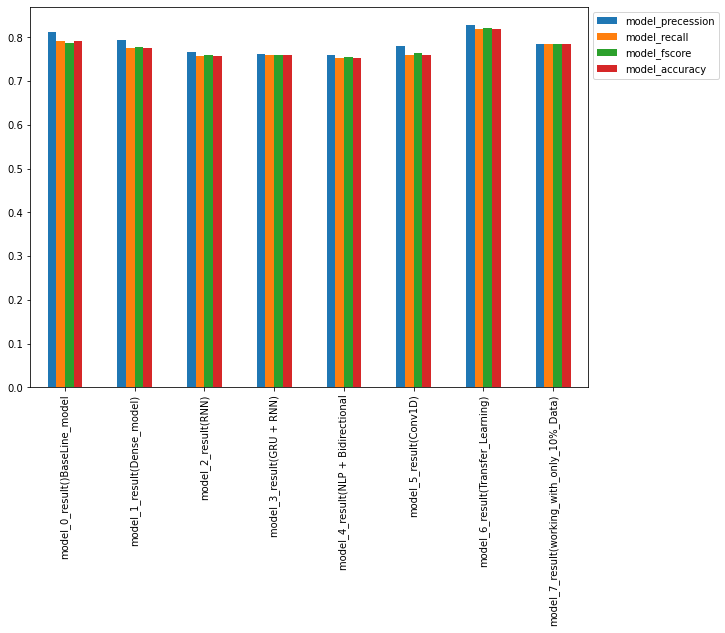

In [87]:
all_model_result.plot(kind="bar", figsize=(10,7)).legend(bbox_to_anchor= (1.0,1.0));

**Inspecting models performance using TensorBoard.dev** - https://tensorboard.dev/

In [88]:
#!tensorboard dev upload --logdir ./Tensorboard_for_NLP/ \
 # --name "NLP modeling experiments"\
  #--one_shot\



Done. View your TensorBoard at https://tensorboard.dev/experiment/G7t8PhqVQJeBxYMo6mjnGA/


# Saving and loading the trained model

1. HDF5 Foramate 
2.SavedModel Formate

In [89]:
#Save model to Hdf5 formate
model_6.save("model_6.h5")

In [90]:
#Load the model with cutome hub layers 
import tensorflow_hub as hub

loaded_model_6= tf.keras.models.load_model("model_6.h5",
                                           custom_objects={"KerasLayer" : hub.KerasLayer})

In [91]:
loaded_model_6.summary()


Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 128)               65664     
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 256,863,617
Trainable params: 65,793
Non-trainable params: 256,797,824
_________________________________________________________________


In [92]:
loaded_model_6.evaluate(y_train, y_test)

24/24 [==============================] - 1s 9ms/step - loss: 0.4253 - accuracy: 0.8189


[0.4252689480781555, 0.8188976645469666]

In [93]:
model_6_result

{'model_accuracy': 0.8188976645469666,
 'model_fscore': 0.8205400235901686,
 'model_precession': 0.8281493548938565,
 'model_recall': 0.8188976377952756}

**Saving & loading the model by SavedModel formate**

In [94]:
model_6.save("model_6_SavedModel_format")

INFO:tensorflow:Assets written to: model_6_SavedModel_format/assets


INFO:tensorflow:Assets written to: model_6_SavedModel_format/assets


In [95]:
Loaded_model_6_SaveModel_format = tf.keras.models.load_model("model_6_SavedModel_format")

In [96]:
#Evaluate model in SavedModel formate
Loaded_model_6_SaveModel_format.evaluate(y_train, y_test)

24/24 [==============================] - 1s 9ms/step - loss: 0.4253 - accuracy: 0.8189


[0.42526888847351074, 0.8188976645469666]

**Finding the most wrong examples**

In [97]:
model_6_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 1.], dtype=float32)>

In [98]:
model_6_preds_prob = tf.squeeze(model_6.predict(y_train))
model_6_preds_prob[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.1518555 , 0.7234883 , 0.9930386 , 0.19356465, 0.6843723 ],
      dtype=float32)>

In [99]:
val_df= pd.DataFrame({
    "text": y_train,
    "real_target":y_test,
    "Predicitions":model_6_preds,
    "predicition_probability":model_6_preds_prob })

val_df[:10]

,text,real_target,Predicitions,predicition_probability
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.151855
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.723488
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.993039
3,@camilacabello97 Internally and externally scr...,1,0.0,0.193565
4,Radiation emergency #preparedness starts with ...,1,1.0,0.684372
5,Investigators rule catastrophic structural fai...,1,1.0,0.703218
6,How the West was burned: Thousands of wildfire...,1,1.0,0.984725
7,Map: Typhoon Soudelor's predicted path as it a...,1,1.0,0.980699
8,Ûª93 blasts accused Yeda Yakub dies in Karach...,1,1.0,0.932912
9,My ears are bleeding https://t.co/k5KnNwugwT,0,0.0,0.087115


In [100]:
#Find the wrong predictions and sort by predictions probabilities 
most_wrong= val_df[val_df["real_target"] != val_df["Predicitions"]].sort_values("predicition_probability", ascending = False)
most_wrong[-10:]

,text,real_target,Predicitions,predicition_probability
40,@BoyInAHorsemask its a panda trapped in a dogs...,1,0.0,0.058544
408,@willienelson We need help! Horses will die!Pl...,1,0.0,0.054973
486,VICTORINOX SWISS ARMY DATE WOMEN'S RUBBER MOP ...,1,0.0,0.054259
294,Lucas Duda is Ghost Rider. Not the Nic Cage ve...,1,0.0,0.053724
59,You can never escape me. Bullets don't harm me...,1,0.0,0.050426
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.045480
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.042490
233,I get to smoke my shit in peace,1,0.0,0.040622
38,Why are you deluged with low self-image? Take ...,1,0.0,0.029699
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.026920


In [101]:
most_wrong[:10]

,text,real_target,Predicitions,predicition_probability
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.903854
628,@noah_anyname That's where the concentration c...,0,1.0,0.870375
759,FedEx will no longer transport bioterror patho...,0,1.0,0.853662
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.839020
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.826443
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.815984
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.811341
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.783530
303,Trafford Centre film fans angry after Odeon ci...,0,1.0,0.776250
381,Deaths 3 http://t.co/nApviyGKYK,0,1.0,0.772687


In [108]:
for row in most_wrong[-10:].itertuples():
  _, text,	real_target,	Predicitions,	predicition_probability = row

  print(f"Target {real_target}, pred: {Predicitions}, predicition_probability: {predicition_probability}")
  print(f"text: {text}\n")

Target 1, pred: 0.0, predicition_probability: 0.05854421108961105
text: @BoyInAHorsemask its a panda trapped in a dogs body

Target 1, pred: 0.0, predicition_probability: 0.05497313663363457
text: @willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

Target 1, pred: 0.0, predicition_probability: 0.054259274154901505
text: VICTORINOX SWISS ARMY DATE WOMEN'S RUBBER MOP WATCH 241487 http://t.co/yFy3nkkcoH http://t.co/KNEhVvOHVK

Target 1, pred: 0.0, predicition_probability: 0.05372397229075432
text: Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

Target 1, pred: 0.0, predicition_probability: 0.05042567849159241
text: You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

Target 1, pred: 0.0, predicition_probability: 0.0454804003238678
text: Reddit Will Now

In [177]:
test_data_pred_prob= model_6.predict(test_data["text"])

test_data_pred = tf.round(tf.squeeze(test_data_pred_prob))

test_data_sentences= test_data["text"].to_list()


test_data_df= pd.DataFrame({"test_data_predicition": test_data_pred[:10],
              
               "test_data_pred_prob": tf.squeeze(test_data_pred_prob[:10]),
               "text": test_data_sentences[:10],
               })

test_data_df

,test_data_predicition,test_data_pred_prob,text
0,1.0,0.522231,Just happened a terrible car crash
1,1.0,0.888674,"Heard about #earthquake is different cities, s..."
2,1.0,0.810277,"there is a forest fire at spot pond, geese are..."
3,1.0,0.938765,Apocalypse lighting. #Spokane #wildfires
4,1.0,0.960314,Typhoon Soudelor kills 28 in China and Taiwan
5,1.0,0.586265,We're shaking...It's an earthquake
6,0.0,0.065800,They'd probably still show more life than Arse...
7,0.0,0.029201,Hey! How are you?
8,0.0,0.039423,What a nice hat?
9,0.0,0.046517,Fuck off!


In [184]:
random_test_senteces

'#CityofCalgary has activated its Municipal Emergency Plan. #yycstorm'

In [202]:
# Making predictions on the test dataset
test_sentences = test_data["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6.predict([test_sample]))
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

Pred: 0, Prob: 0.1458236128091812
Text:
Remove the http://t.co/zmoKZZf4qp and Linkury Browser Hijacker. PITA as it hijacks both browsers and their shortcuts.
http://t.co/QWDkzTi97g

----

Pred: 0, Prob: 0.07806465774774551
Text:
I don't understand how White Iverson by Post Malone hasn't blown the fuck *UP* already.

----

Pred: 1, Prob: 0.7928470969200134
Text:
Islamic State threatens to kill another hostage: @DailyGleaner @TJProvincial @TJGreaterSJ http://t.co/dfPLiqjMk2

----

Pred: 1, Prob: 0.7536041140556335
Text:
@adolwyn This near U? @JWagstaffe: RT @OldsFireDept: Aug 5 2015 Hwy27 west of Olds. Approximately 1 foot of hail. http://t.co/Yg0pd73Bpw'

----

Pred: 0, Prob: 0.0240529365837574
Text:
@MeganRestivo I am literally screaming for you!! Congratulations!

----

Pred: 0, Prob: 0.1923770308494568
Text:
AND I'M DROWNING IN THE DÌäJÌÛ VUUUUU WE'VE SEEN IT ALL BEFOOOOOOOORE

----

Pred: 0, Prob: 0.12180065363645554
Text:
Yes. He said its dropping soon '@SDotJR_: NO WAYS!!! A video

 **Making peridiction from custom data**

In [217]:
custom_pred_prob=tf.squeeze(model_6.predict(["6 Killed In Firecracker Explosion In Bihar Businessman House"]))
custom_pred = tf.round(custom_pred_prob) 

print(f"custom_pred: {custom_pred}")
print(f"custom_pred_prob: {custom_pred_prob}")

custom_pred: 1.0
custom_pred_prob: 0.9576371908187866
